# Biodiversity Project

The goal of this project is to analyze biodiversity data which centers around various species observed in different national park locations.

A few questions that we have looked to answer:
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?

#### Data Sources:
Both Observations.csv and Species_Info.csv were provided by Codeacademy.com. \
This data is inspired by real data, but is mostly fictional.

### Loading and observing the datasets

In [10]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#load the data
obsv = pd.read_csv('observations.csv')
spec = pd.read_csv('species_info.csv')

#observing the data
print(obsv.head(), '\n')
print(spec.head(), '\n')

print('These are the column names:\n')
print(obsv.columns, '\n')
print(spec.columns, '\n')

print('These are the data types of the columns:\n')
print(obsv.dtypes, '\n')
print(spec.dtypes, '\n')

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domesti

### Exploring the data

In [11]:
#check the shape of the data

print(f"species shape: {spec.shape}")
print(f"observations shape: {obsv.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [12]:
#calculating summary statistics

obsv_stat = obsv.describe()
spec_stat = spec.describe()

mean_obsv = obsv.observations.mean().round(2)
count_obsv = obsv[['scientific_name', 'observations']].groupby('observations').max()

count_consv = spec['conservation_status'].value_counts()

In [13]:
#displaying the stats

print('These are some summary statistics of the whole dataframes:\n')
print(obsv_stat, '\n')
print(spec_stat, '\n')
print('\n')

print('Some summary statistics of specific columns:\n')
print('The mean number of observations in the park is',mean_obsv, 'observations. \n')

print('The top 5 most and least observed species are:', count_obsv, '\n')

print('Here are the conservation status counts:\n')
print(count_consv)

These are some summary statistics of the whole dataframes:

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000 

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161   



Some summary statistics of specific columns:

The mean number of observations in the park is 142.29 observations. 

The top 5 most and least observed species are:                              scientific_name
observations                                
9                            C

In [14]:
#exploring a little more of the species data

print(f"number of categories: {spec.category.nunique()}")
print(f"categories: {spec.category.unique()}\n")

print(spec.groupby('category').size())

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [15]:
#exploring a little more of the observation data

print(f"number of parks: {obsv.park_name.nunique()}")
print(f"unique parks: {obsv.park_name.unique()}\n")

#total number of observations
print(f"Total number of observations: {obsv.observations.sum()}")

number of parks: 4
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

Total number of observations: 3314739


In [26]:
#manipulate and clean the data
spec.fillna('Safe', inplace=True)
print(spec.groupby('conservation_status').size())

#checking for anymore nulls
#print(obsv.isna().sum())
#print(spec.isna().sum())



conservation_status
Endangered              16
In Recovery              4
Safe                  5633
Species of Concern     161
Threatened              10
dtype: int64


### Trying to answer the first question

In [17]:
#visualizing the data

#sampling the data for one our viz
perc = 0.1
obsv_sub = obsv.sample(n = int(obsv.shape[0]*perc))
spec_sub = spec.sample(n = int(spec.shape[0]*perc))

In [18]:
category_freq = pd.crosstab(spec.category, spec.conservation_status)
print(category_freq)

conservation_status  Endangered  In Recovery  Safe  Species of Concern  \
category                                                                 
Amphibian                     1            0    73                   4   
Bird                          4            3   442                  72   
Fish                          3            0   116                   4   
Mammal                        7            1   176                  28   
Nonvascular Plant             0            0   328                   5   
Reptile                       0            0    74                   5   
Vascular Plant                1            0  4424                  43   

conservation_status  Threatened  
category                         
Amphibian                     2  
Bird                          0  
Fish                          4  
Mammal                        2  
Nonvascular Plant             0  
Reptile                       0  
Vascular Plant                2  


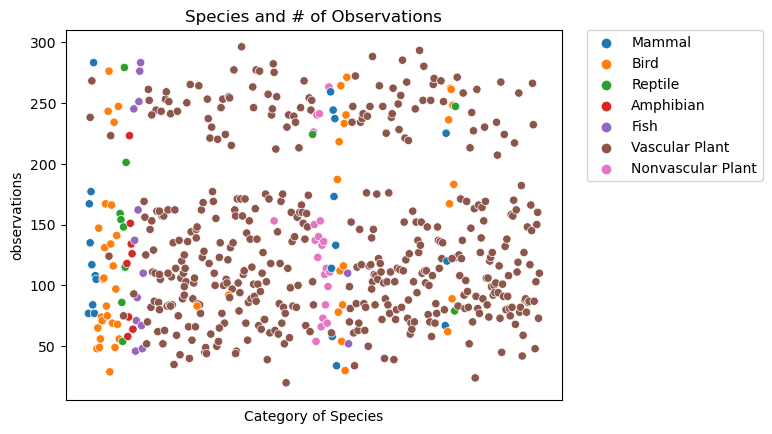

<Figure size 640x480 with 0 Axes>

In [19]:
sns.scatterplot( x = 'scientific_name', y='observations', hue=spec.category, data=obsv_sub)
frame1= plt.gca()
frame1.xaxis.set_tick_params(labelleft=False)
frame1.set_xticks([])
plt.xlabel('Category of Species')
plt.title('Species and # of Observations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

Text(0, 0.5, 'Number of Species')

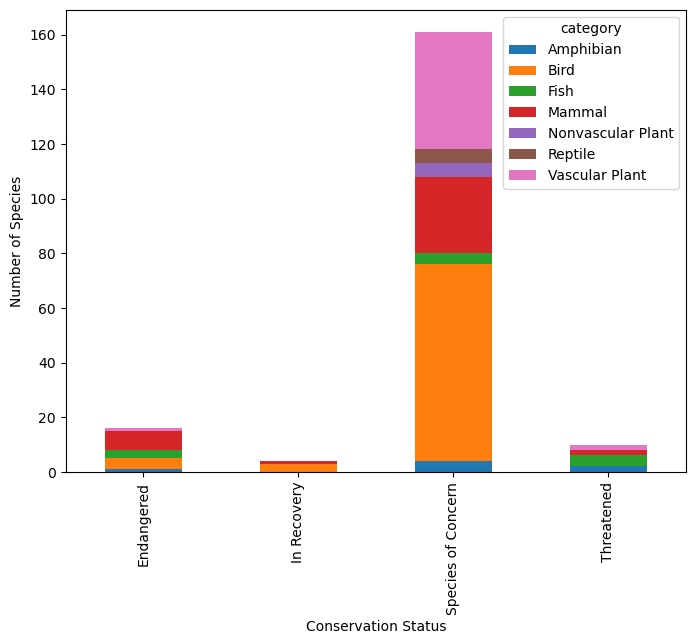

In [20]:
conservationCategory = spec[spec.conservation_status != "Safe"]\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

ax1 = conservationCategory.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax1.set_xlabel('Conservation Status')
ax1.set_ylabel('Number of Species')

### Trying to answer the second question

In [21]:
spec['is_protected'] = spec.conservation_status != 'Safe'

In [22]:
category_prot = spec.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_prot.columns = ['category', 'not_protected', 'protected']

print(category_prot)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46


In [23]:
#translate into percentages

category_prot['percent_protected'] = category_prot.protected / (category_prot.protected + category_prot.not_protected)* 100

print(category_prot)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           8.860759
1               Bird            413         75          15.368852
2               Fish            115         11           8.730159
3             Mammal            146         30          17.045455
4  Nonvascular Plant            328          5           1.501502
5            Reptile             73          5           6.410256
6     Vascular Plant           4216         46           1.079305


### Trying to answer the third question
#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called contingency1 and will need to be filled with the correct numbers for mammals and birds.


In [24]:
from scipy.stats import chi2_contingency
contingency1 = [[30, 146],
              [75, 413]]
print(chi2_contingency(contingency1))

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))


The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds, there doesn't seem to be any significant relationship between them.

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|


In [25]:
contingency2 = [[30, 146],
               [5, 73]]
print(chi2_contingency(contingency2))

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))


This time the p-value is 0.039 which is below the standard threshold of 0.05 which can mean that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection when compared to Reptiles. 

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation. (5,633 safe vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.